# Linear Classification and Stochastic Gradient Descent

In [80]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from pylab import *
from sklearn.datasets import load_svmlight_file
import random

In [81]:
#read data
x_train,y_train = load_svmlight_file("a9a")
x_test,y_test = load_svmlight_file("a9a.t",n_features=123)
#if validation set needed
#x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.33) 

(n,m) = x_train.shape
print("The demensin of x_train dataset is:",(n,m))
print("The demensin of x_test dataset is:",x_test.shape)

The demensin of x_train dataset is: (32561, 123)
The demensin of x_test dataset is: (16281, 123)


In [82]:
#initialize data
x_train = x_train.todense()
x_test = x_test.todense()
#add constant term row
x_train = np.hstack((np.ones((n,1)),x_train))
x_test = np.hstack((np.ones((len(x_test),1)),x_test)) 
y_train = y_train.reshape((n,1))
y_test = y_test.reshape((len(y_test),1))


#if labels are {0,1}
#idx = np.where(y_train =  = 0)
#y_train[idx] = -1

In [219]:
def rightRate(gd,pred):
    pred[pred>-1] = 1
    pred[pred<=-1] = -1
    right=np.count_nonzero(pred==gd)
    return right/len(gd)

In [134]:
def NAG(parameters, gradients, eta=0.05, momentum=0.9):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    v = np.zeros(para_num)
    next_v = np.zeros(para_num)
    for i in range(para_num):
        next_v[i] = momentum * v[i] + eta * gradients[i,0] 
        updates[i,0] = parameters[i,0] - momentum * next_v[i] - eta * gradients[i,0]
    return updates

In [181]:
def RMSProp(parameters, gradients, eta=0.002, momentum=0.9, epsilon=1e-8):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    G = np.zeros(para_num)
    next_G = np.zeros(para_num)
    for i in range(para_num):
        next_G[i] = momentum * G[i] + (1 - momentum) * np.square(gradients[i,0])
        updates[i,0] = parameters[i,0] - eta * gradients[i,0] / np.sqrt(next_G[i] + epsilon)
    return updates

In [157]:
def AdaDelta(parameters, gradients, momentum=0.95, epsilon=1e-6):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    G = np.zeros(para_num)
    next_G = np.zeros(para_num)
    dx = np.zeros(para_num)
    next_dx = np.zeros(para_num)
    for i in range(para_num):
        next_G[i] = momentum * G[i] + (1 - momentum) * np.square(gradients[i,0])
        next_dx[i] = np.sqrt(dx[i] + epsilon) / np.sqrt(next_G[i] + epsilon)
        updates[i,0] =parameters[i,0] - next_dx[i] * gradients[i,0]
    return updates

In [206]:
def Adam(parameters, gradients, eta=0.002, momentum=0.999, beta=0.9, epsilon=1e-8):
    para_num = len(parameters)
    updates = np.zeros((para_num,1))
    G = np.zeros(para_num)
    next_G = np.zeros(para_num)
    m = np.zeros(para_num)
    next_m = np.zeros(para_num)
    for i in range(para_num):
        next_m[i] = beta * m[i] + (1 - beta) * gradients[i,0] 
        next_G[i] = momentum * G[i] + (1 - momentum) * np.square(gradients[i,0])
        updates[i,0] = parameters[i,0] - eta * np.sqrt(1 - momentum) / (1 - beta) * next_m[i] / np.sqrt(next_G[i] + epsilon)
    return updates

In [218]:
W = np.zeros((m+1,1)) #weights
loss_train_NAG = []
loss_test_NAG = []
MAX_LOOPS = 1000
batch_size = 128
cnt = 0
C = 0.01
eta = 0.05
y_train_pred_batch = []

#Mini-batch Stochastic Gradient Descent with NAG

while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    y_train_pred_batch = x_train_batch *W;  
    g = 1-np.multiply(y_train_batch,y_train_pred_batch)
    idx_1 = np.where(g>=0)[0]
    idx_2 = np.where(g<0)[0]
    deltaW_2 = -W.T    
    deltaW_1 = C*y_train_batch.T*x_train_batch+deltaW_2
    deltaW = eta*((deltaW_1*len(idx_1)+deltaW_2*len(idx_2))/batch_size)
    W = NAG(W,-deltaW.T,eta)
    y_train_pred = x_train*W
    g = 1-np.multiply(y_train,y_train_pred)

    loss_train_NAG.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((n,1)),g)))/n)
    y_test_pred = x_test*W
    loss_test_NAG.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((len(y_test),1)),1-np.multiply(y_test,y_test_pred))))/len(y_test))
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

The accuracy: 0.7829985873103618


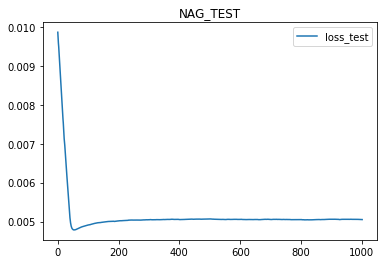

In [215]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_NAG[:],label='loss_test')
title("NAG_TEST")
legend()
plt.show()

In [220]:
W = np.zeros((m+1,1)) #weights
loss_train_RMSProp = []
loss_test_RMSProp = []
MAX_LOOPS = 1000
batch_size = 128
cnt = 0
C = 0.01
eta = 0.001
y_train_pred_batch = []

#Mini-batch Stochastic Gradient Descent with RMSProp

while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    y_train_pred_batch = x_train_batch *W;  
    g = 1-np.multiply(y_train_batch,y_train_pred_batch)
    idx_1 = np.where(g>=0)[0]
    idx_2 = np.where(g<0)[0]
    deltaW_2 = -W.T    
    deltaW_1 = C*y_train_batch.T*x_train_batch+deltaW_2
    deltaW = eta*((deltaW_1*len(idx_1)+deltaW_2*len(idx_2))/batch_size)
    W = RMSProp(W,-deltaW.T,eta)
    y_train_pred = x_train*W
    g = 1-np.multiply(y_train,y_train_pred)

    loss_train_RMSProp.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((n,1)),g)))/n)
    y_test_pred = x_test*W
    loss_test_RMSProp.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((len(y_test),1)),1-np.multiply(y_test,y_test_pred))))/len(y_test))
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

The accuracy: 0.7817087402493704


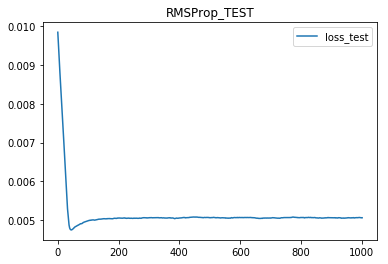

In [221]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_RMSProp[:],label='loss_test')
title("RMSProp_TEST")
legend()
plt.show()

In [222]:
W = np.zeros((m+1,1)) #weights
loss_train_AdaDelta = []
loss_test_AdaDelta = []
MAX_LOOPS = 1000
batch_size = 128
cnt = 0
C = 0.01
y_train_pred_batch = []

#Mini-batch Stochastic Gradient Descent with AdaDelta

while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    y_train_pred_batch = x_train_batch *W;  
    g = 1-np.multiply(y_train_batch,y_train_pred_batch)
    idx_1 = np.where(g>=0)[0]
    idx_2 = np.where(g<0)[0]
    deltaW_2 = -W.T    
    deltaW_1 = C*y_train_batch.T*x_train_batch+deltaW_2
    deltaW = eta*((deltaW_1*len(idx_1)+deltaW_2*len(idx_2))/batch_size)
    W = AdaDelta(W,-deltaW.T)
    y_train_pred = x_train*W
    g = 1-np.multiply(y_train,y_train_pred)

    loss_train_AdaDelta.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((n,1)),g)))/n)
    y_test_pred = x_test*W
    loss_test_AdaDelta.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((len(y_test),1)),1-np.multiply(y_test,y_test_pred))))/len(y_test))
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1


The accuracy: 0.7809716847859468


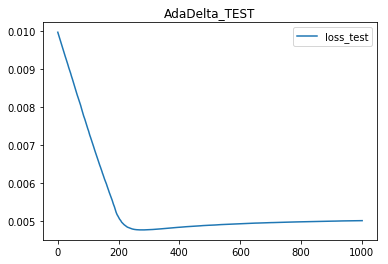

In [223]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_AdaDelta[:],label='loss_test')
title("AdaDelta_TEST")
legend()
plt.show()

In [224]:
W = np.zeros((m+1,1)) #weights
loss_train_Adam = []
loss_test_Adam = []
MAX_LOOPS = 1000
batch_size = 128
cnt = 0
C = 0.01
eta = 0.002
y_train_pred_batch = []

#Mini-batch Stochastic Gradient Descent with Adam

while True:
    idx = random.sample(range(0,n),batch_size)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    y_train_pred_batch = x_train_batch *W;  
    g = 1-np.multiply(y_train_batch,y_train_pred_batch)
    idx_1 = np.where(g>=0)[0]
    idx_2 = np.where(g<0)[0]
    deltaW_2 = -W.T    
    deltaW_1 = C*y_train_batch.T*x_train_batch+deltaW_2
    deltaW = eta*((deltaW_1*len(idx_1)+deltaW_2*len(idx_2))/batch_size)
    W = Adam(W,-deltaW.T,eta)
    y_train_pred = x_train*W
    g = 1-np.multiply(y_train,y_train_pred)

    loss_train_Adam.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((n,1)),g)))/n)
    y_test_pred = x_test*W
    loss_test_Adam.append(((np.linalg.norm(W))**2/2+C*sum(np.maximum(zeros((len(y_test),1)),1-np.multiply(y_test,y_test_pred))))/len(y_test))
    if cnt>MAX_LOOPS:
        break
    cnt = cnt+1

The accuracy: 0.7822615318469381


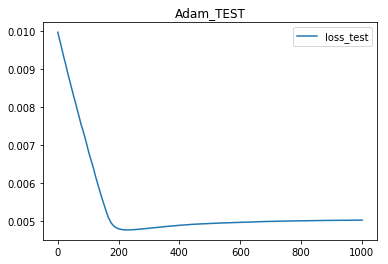

In [225]:
print("The accuracy:",rightRate(y_test,y_test_pred))

plot(loss_test_Adam[:],label='loss_test')
title("Adam_TEST")
legend()
plt.show()

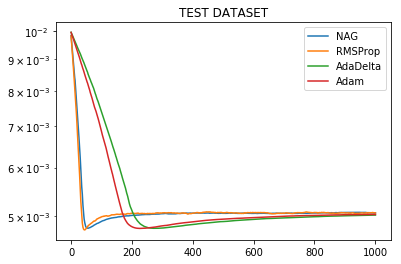

In [226]:
plt.yscale('log')
plot(loss_test_NAG,label='NAG')
plot(loss_test_RMSProp,label='RMSProp')
plot(loss_test_AdaDelta,label='AdaDelta')
plot(loss_test_Adam,label='Adam')
title("TEST DATASET")
legend()
plt.show()